In [1]:
!pip install mordred
!pip install umap

  Preparing metadata (setup.py) ... done
  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3542 sha256=d594073a2f252f877eccada18300e68040d7fbabd0960792220a6cecc59142ac
  Stored in directory: /home/ritesh/.cache/pip/wheels/82/d8/73/e9eb3334baaad795ff0278363ff1aca7568bdf2793e452a527
Successfully built umap


In [4]:
import os,re,sys,pickle,datetime,time,random,itertools
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from scipy import stats
import math
from tqdm import tqdm
import seaborn as sns
import umap
from multiprocessing import freeze_support
import mordred
from mordred import Calculator, descriptors
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA,NMF
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PolynomialFeatures
import rdkit
from rdkit import Chem
from rdkit.Chem import DataStructs, AllChem, MolFromSmiles, PandasTools, Descriptors, Draw, PropertyMol, rdmolfiles, rdFMCS
from rdkit import RDConfig
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem.Draw import MolsToGridImage, IPythonConsole, rdMolDraw2D
from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions, Font
DrawingOptions.bondLineWidth=1.8
DrawingOptions.includeAtomNumbers=False
size = (150, 150)
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from PIL import Image
randomstate = 42

In [5]:
filepath1 = "/home/ritesh/Desktop/MOLECULES/morgan/finaldatasetman.csv"
mols = pd.read_csv(filepath1)
mols

,SMILES
0,CCCCOC(=O)C(C)OC(=O)CCC
1,CC(C)CC(=O)O
2,CCCCCCCCC(=O)O
3,CCC(C)CC(=O)O
4,CC(C)CCC(=O)O
...,...
56,CC(C)C=O
57,CCCC(=O)OCC
58,C/C=C/C(=O)C1=C(C)C=CCC1(C)C
59,CCC1=NC=C(N=C1C)C


In [6]:
mols = mols.drop_duplicates(subset=['smiles'])
mols

KeyError: Index(['smiles'], dtype='object')

In [8]:
mols['rdmol'] = mols['SMILES'].map(lambda x: Chem.MolFromSmiles(x))
mols['inchi'] = mols['rdmol'].map(Chem.MolToInchi)
mols = mols.drop_duplicates(subset="inchi")

print('Number of SMILES after duplicates removed:',len(mols))

mols

Number of SMILES after duplicates removed: 59


[14:41:44] WARNING: Omitted undefined stereo

[14:41:44] WARNING: Omitted undefined stereo

[14:41:44] WARNING: Omitted undefined stereo

[14:41:44] WARNING: Omitted undefined stereo

[14:41:44] WARNING: Omitted undefined stereo

[14:41:44] WARNING: Charges were rearranged

[14:41:44] WARNING: Omitted undefined stereo

[14:41:44] WARNING: Proton(s) added/removed

[14:41:44] WARNING: Omitted undefined stereo



,SMILES,rdmol,inchi
0,CCCCOC(=O)C(C)OC(=O)CCC,<rdkit.Chem.rdchem.Mol object at 0x7f4b026c1e00>,InChI=1S/C11H20O4/c1-4-6-8-14-11(13)9(3)15-10(...
1,CC(C)CC(=O)O,<rdkit.Chem.rdchem.Mol object at 0x7f4b026c23b0>,"InChI=1S/C5H10O2/c1-4(2)3-5(6)7/h4H,3H2,1-2H3,..."
2,CCCCCCCCC(=O)O,<rdkit.Chem.rdchem.Mol object at 0x7f4b026c2650>,InChI=1S/C9H18O2/c1-2-3-4-5-6-7-8-9(10)11/h2-8...
3,CCC(C)CC(=O)O,<rdkit.Chem.rdchem.Mol object at 0x7f4b026c27a0>,"InChI=1S/C6H12O2/c1-3-5(2)4-6(7)8/h5H,3-4H2,1-..."
4,CC(C)CCC(=O)O,<rdkit.Chem.rdchem.Mol object at 0x7f4b026c2810>,"InChI=1S/C6H12O2/c1-5(2)3-4-6(7)8/h5H,3-4H2,1-..."
5,CCCC(=O)O,<rdkit.Chem.rdchem.Mol object at 0x7f4b026c2a40>,"InChI=1S/C4H8O2/c1-2-3-4(5)6/h2-3H2,1H3,(H,5,6)"
6,CCC(C)C(=O)O,<rdkit.Chem.rdchem.Mol object at 0x7f4b026c2b20>,"InChI=1S/C5H10O2/c1-3-4(2)5(6)7/h4H,3H2,1-2H3,..."
7,C1CC(C1)C(=O)O,<rdkit.Chem.rdchem.Mol object at 0x7f4b026c2b90>,"InChI=1S/C5H8O2/c6-5(7)4-2-1-3-4/h4H,1-3H2,(H,..."
8,C1=CC=C(C=C1)C=O,<rdkit.Chem.rdchem.Mol object at 0x7f4b026c2ce0>,InChI=1S/C7H6O/c8-6-7-4-2-1-3-5-7/h1-6H
9,CC(C(C)O)O,<rdkit.Chem.rdchem.Mol object at 0x7f4b026c2d50>,"InChI=1S/C4H10O2/c1-3(5)4(2)6/h3-6H,1-2H3"


In [9]:
def embed(mol):
    mol_with_H = Chem.AddHs(mol)
    Chem.AllChem.EmbedMolecule(mol_with_H)
    Chem.AllChem.MMFFOptimizeMolecule(mol_with_H)
    return mol_with_H

mols['rdmol_optimized'] = mols.rdmol.map(embed)

mols

,SMILES,rdmol,inchi,rdmol_optimized
0,CCCCOC(=O)C(C)OC(=O)CCC,<rdkit.Chem.rdchem.Mol object at 0x7f4b026c1e00>,InChI=1S/C11H20O4/c1-4-6-8-14-11(13)9(3)15-10(...,<rdkit.Chem.rdchem.Mol object at 0x7f4b01c8be60>
1,CC(C)CC(=O)O,<rdkit.Chem.rdchem.Mol object at 0x7f4b026c23b0>,"InChI=1S/C5H10O2/c1-4(2)3-5(6)7/h4H,3H2,1-2H3,...",<rdkit.Chem.rdchem.Mol object at 0x7f4b026c19a0>
2,CCCCCCCCC(=O)O,<rdkit.Chem.rdchem.Mol object at 0x7f4b026c2650>,InChI=1S/C9H18O2/c1-2-3-4-5-6-7-8-9(10)11/h2-8...,<rdkit.Chem.rdchem.Mol object at 0x7f4b026c1850>
3,CCC(C)CC(=O)O,<rdkit.Chem.rdchem.Mol object at 0x7f4b026c27a0>,"InChI=1S/C6H12O2/c1-3-5(2)4-6(7)8/h5H,3-4H2,1-...",<rdkit.Chem.rdchem.Mol object at 0x7f4b01c8a570>
4,CC(C)CCC(=O)O,<rdkit.Chem.rdchem.Mol object at 0x7f4b026c2810>,"InChI=1S/C6H12O2/c1-5(2)3-4-6(7)8/h5H,3-4H2,1-...",<rdkit.Chem.rdchem.Mol object at 0x7f4b01c8bed0>
5,CCCC(=O)O,<rdkit.Chem.rdchem.Mol object at 0x7f4b026c2a40>,"InChI=1S/C4H8O2/c1-2-3-4(5)6/h2-3H2,1H3,(H,5,6)",<rdkit.Chem.rdchem.Mol object at 0x7f4b01c8a5e0>
6,CCC(C)C(=O)O,<rdkit.Chem.rdchem.Mol object at 0x7f4b026c2b20>,"InChI=1S/C5H10O2/c1-3-4(2)5(6)7/h4H,3H2,1-2H3,...",<rdkit.Chem.rdchem.Mol object at 0x7f4b01c8a490>
7,C1CC(C1)C(=O)O,<rdkit.Chem.rdchem.Mol object at 0x7f4b026c2b90>,"InChI=1S/C5H8O2/c6-5(7)4-2-1-3-4/h4H,1-3H2,(H,...",<rdkit.Chem.rdchem.Mol object at 0x7f4b01c8a3b0>
8,C1=CC=C(C=C1)C=O,<rdkit.Chem.rdchem.Mol object at 0x7f4b026c2ce0>,InChI=1S/C7H6O/c8-6-7-4-2-1-3-5-7/h1-6H,<rdkit.Chem.rdchem.Mol object at 0x7f4b01c89b60>
9,CC(C(C)O)O,<rdkit.Chem.rdchem.Mol object at 0x7f4b026c2d50>,"InChI=1S/C4H10O2/c1-3(5)4(2)6/h3-6H,1-2H3",<rdkit.Chem.rdchem.Mol object at 0x7f4b01c8a1f0>


In [10]:
calc = Calculator(descriptors) # create calculator for all mordred descriptors (can also specify subtype)

df=calc.pandas(mols['rdmol_optimized'])
print(df)

100%|██████████| 59/59 [00:02<00:00, 27.33it/s]


                                                  ABC  \
0   module 'numpy' has no attribute 'float'.\n`np....   
1   module 'numpy' has no attribute 'float'.\n`np....   
2   module 'numpy' has no attribute 'float'.\n`np....   
3   module 'numpy' has no attribute 'float'.\n`np....   
4   module 'numpy' has no attribute 'float'.\n`np....   
5   module 'numpy' has no attribute 'float'.\n`np....   
6   module 'numpy' has no attribute 'float'.\n`np....   
7   module 'numpy' has no attribute 'float'.\n`np....   
8   module 'numpy' has no attribute 'float'.\n`np....   
9   module 'numpy' has no attribute 'float'.\n`np....   
10  module 'numpy' has no attribute 'float'.\n`np....   
11  module 'numpy' has no attribute 'float'.\n`np....   
12  module 'numpy' has no attribute 'float'.\n`np....   
13  module 'numpy' has no attribute 'float'.\n`np....   
14  module 'numpy' has no attribute 'float'.\n`np....   
15  module 'numpy' has no attribute 'float'.\n`np....   
16  module 'numpy' has no attri

In [11]:
#Replace mordred errors with NaNs then drop those descriptors/columns
df=df.applymap(lambda x: np.nan if type(x) in [mordred.error.Missing,mordred.error.Error] else x)
df=df.dropna(axis=1)
print(df.shape)

(59, 1227)


In [12]:
#Dropping columns that have a single value
non_zero_std = df.std() != 0
df = df [non_zero_std[non_zero_std].index]
print(df.shape)

(59, 982)


In [16]:
#Dropping highly correlated descriptors: If a pair of descriptors have a Pearson correlation coefficient (r) value greater than the threshold then one descriptor will be removed.
threshold=0.95
df_corr = df.corr().abs()
upper = df_corr.where(np.triu(np.ones(df_corr.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
df = df.drop(to_drop, axis=1)
print(df.shape)

(59, 421)


In [18]:
#saving the csv list
to_save=pd.concat([mols[['SMILES']], df], axis=1)
to_save

,SMILES,nAcid,nBase,SpAbs_A,SpMax_A,SpMAD_A,VR1_A,nAromAtom,nAtom,nHetero,...,JGI5,JGI6,JGI7,JGI8,JGI9,JGT10,Radius,TopoShapeIndex,TSRW10,mZagreb1
0,CCCCOC(=O)C(C)OC(=O)CCC,0,0,17.250180,2.180397,1.150012,86.757752,0,35,4,...,0.025641,0.014842,0.007812,0.009877,0.005000,0.474966,6,0.833333,44.789525,7.083333
1,CC(C)CC(=O)O,1,0,6.828427,2.000000,0.975490,15.313708,0,17,2,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.605159,2,1.000000,32.211905,4.472222
2,CCCCCCCCC(=O)O,1,0,12.784906,1.975377,1.162264,40.627340,0,29,2,...,0.018519,0.016327,0.015625,0.016461,0.000000,0.315483,5,0.800000,37.843620,4.861111
3,CCC(C)CC(=O)O,1,0,8.565187,2.042079,1.070648,19.937685,0,20,2,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.555810,3,0.666667,34.080836,4.722222
4,CC(C)CCC(=O)O,1,0,8.472136,2.000000,1.059017,19.357315,0,20,2,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.570476,3,0.666667,33.811160,4.722222
5,CCCC(=O)O,1,0,6.155367,1.902113,1.025895,12.391163,0,14,2,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.472222,2,1.000000,29.439488,3.611111
6,CCC(C)C(=O)O,1,0,7.662988,2.052881,1.094713,15.711649,0,17,2,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.533730,2,1.000000,32.688753,4.472222
7,C1CC(C1)C(=O)O,1,0,7.300563,2.236068,1.042938,18.849951,0,15,2,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.511508,2,1.000000,35.280476,2.972222
8,C1=CC=C(C=C1)C=O,0,0,10.424292,2.135779,1.303037,23.560979,6,14,1,...,0.062500,0.000000,0.000000,0.000000,0.000000,0.314039,3,0.666667,35.247635,2.611111
9,CC(C(C)O)O,0,0,6.000000,2.000000,1.000000,11.530010,0,16,2,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.548148,2,0.500000,30.698690,4.222222


In [19]:
to_save.to_csv('mordred_descriptors.csv', index = True)

In [20]:
#STARTING THE PCA OF THE OBTAINED DESCRIPTORS

In [44]:
df.index = df.index.astype(int)
df.dropna(axis=0,inplace=True)
X_all = np.array(df)
X_all_ids = np.array(df.index)
scaler = StandardScaler()
scaler.fit(X_all)
X_all_sc = scaler.transform(X_all)

pca = PCA(n_components=10)     # choose number of PCs

pca.fit(X_all_sc)
X_all_pca    = pca.transform(X_all_sc)
pca_score = pca.explained_variance_ratio_
pca_values = pca.singular_values_
print('Variance explained by individual PCs:',np.around(pca.explained_variance_ratio_, decimals=2),'\n')
print('Total variance explained by PCs:',np.around(np.sum(pca.explained_variance_ratio_), decimals=2))

Variance explained by individual PCs: [0.2  0.14 0.11 0.08 0.06 0.05 0.04 0.04 0.03 0.03] 

Total variance explained by PCs: 0.78


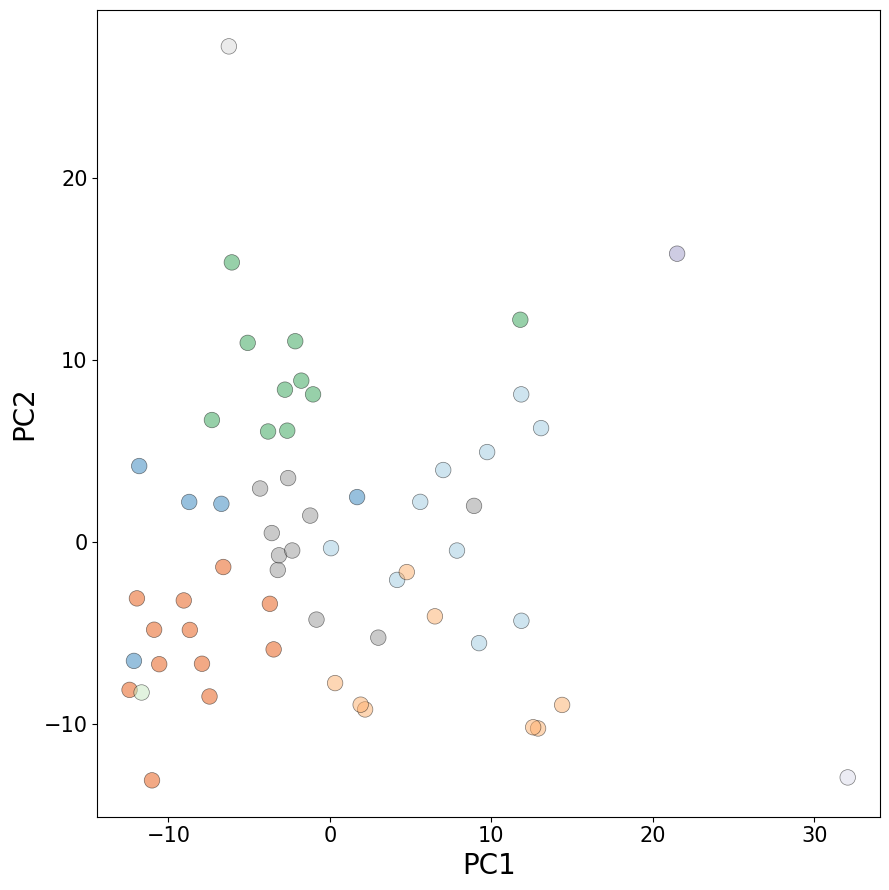

In [46]:
nclusters = 10     # choose number of clusters

####################################################################################

X_use = X_all_pca
X_main_ids = X_all_ids
X_kmeans = X_all_pca
kmeans = KMeans(n_clusters=nclusters, random_state=42).fit(X_kmeans)
dists = []
for x in range(len(X_kmeans)):
    delta = [X_kmeans[x,i]-kmeans.cluster_centers_[kmeans.labels_[x],i] for i in range(len(X_kmeans[0]))]
    dist = np.linalg.norm(delta)
    dists.append(dist)
clusters = {}
clusterdists = {}
clustermins = []
clusterorders_dict = {}
clusterorders = np.zeros(X_kmeans.shape[0])
for x in range(nclusters):
    clusters[x] = [i for i in range(len(kmeans.labels_)) if kmeans.labels_[i] == x]
    clusterdists[x] = [dists[i] for i in clusters[x]]
    clustermins.append(clusters[x][clusterdists[x].index(min(clusterdists[x]))])
    clusterorders_dict[x] = [y for _,y in sorted(zip(clusterdists[x],clusters[x]))]
    for i in clusters[x]:
        clusterorders[i] = clusterorders_dict[x].index(i)+1
f_ind_1 = 0
f_ind_2 = 1
x_min, x_max = X_kmeans[:, f_ind_1].min() - 2, X_kmeans[:, f_ind_1].max() + 2
y_min, y_max = X_kmeans[:, f_ind_2].min() - 2, X_kmeans[:, f_ind_2].max() + 2
plt.figure(figsize=(9,9))
extent = [x_min,x_max,y_min,y_max]
plt.xticks(fontsize=15) 
plt.yticks(fontsize=15)
plt.xlabel(r"PC1",fontsize=20)
plt.ylabel(r"PC2",fontsize=20)
plt.locator_params(axis='y', nbins=8)
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
mapping = kmeans.labels_
cMap = "tab20c"
plt.scatter(X_kmeans[:,f_ind_1], X_kmeans[:,f_ind_2],c=mapping,cmap=cMap,alpha=.5,marker=".",s=500,edgecolor="black",linewidth=0.5)
main_row_id = list(enumerate(X_main_ids))
clusters_with_ids = {}
for i in range(0,len(clusters)):
    emptylist = []
    for j in range(0,len(clusters[i])):
        emptylist.append(main_row_id[clusters[i][j]][1])
    clusters_with_ids[i] = emptylist
    
### plot ligand ids    
#for i in range(0,nclusters):
#    for j in range(0,len(clusters_with_ids[i])):
#        plt.text(X_use[clusters[i][j],f_ind_1],X_use[clusters[i][j],f_ind_2]," "+str(clusters_with_ids[i][j]),color="blue",fontsize=12,ha="left")

### plot centroid labels
#for i in range(0,nclusters):
#    for j in range(0,len(clusters_with_ids[i])):
#        if clusters[i][j] in clustermins:
#            plt.text(X_use[clusters[i][j],f_ind_1],X_use[clusters[i][j],f_ind_2]," "+str(clusters_with_ids[i][j]),color="red",fontsize=13,ha="right")
    
plt.tight_layout()
#plt.savefig("mordred_pca_plot.png",dpi=300)
plt.show()     


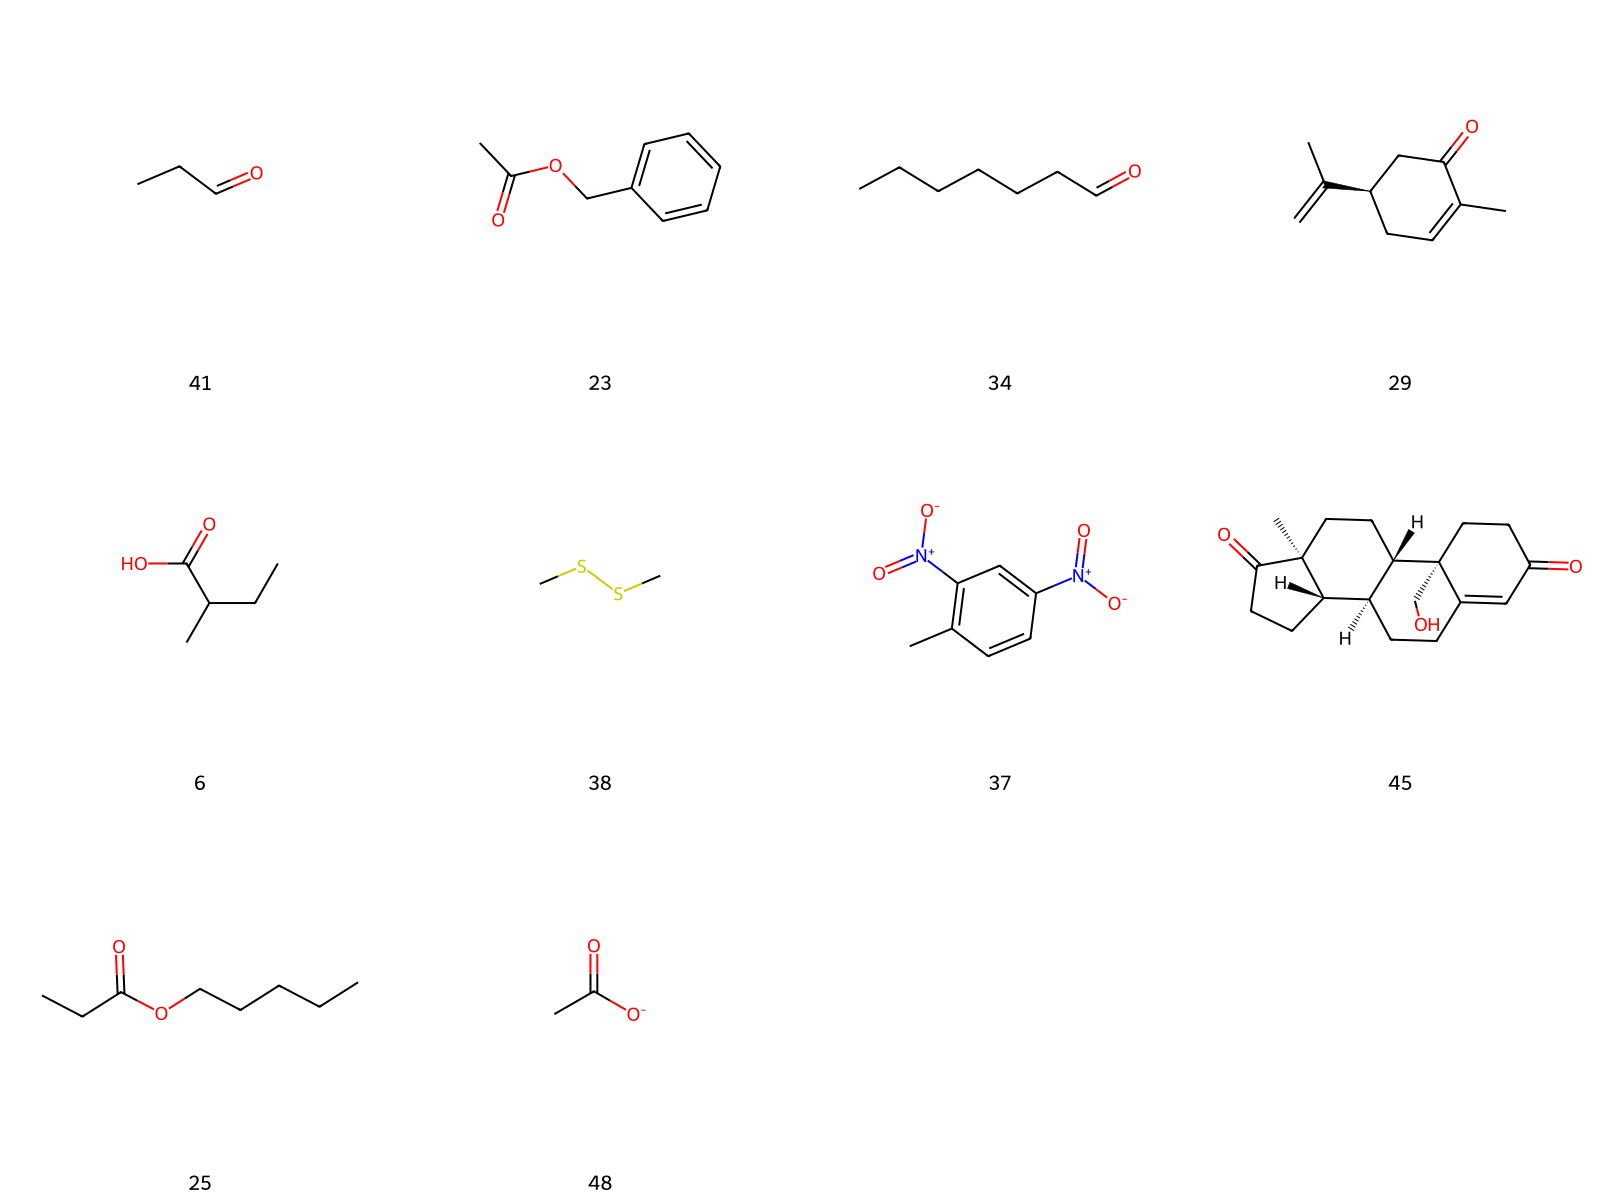

In [47]:
#printing structures closest to the centroids
smiles = list(mols['SMILES'])

closest_to_centroids = []
for i in clustermins:
    closest_to_centroids.append(smiles[i])

count=0
subms = []
for i in closest_to_centroids:
    x = Chem.MolFromSmiles(i)
    count+=1
    subms.append(x)
clustermins_str = [str(i) for i in clustermins]
my_labels = clustermins_str  
molsPerRow = 4
subImgSize= (400,400)
nRows = -(count // -molsPerRow)
fullSize = (molsPerRow * subImgSize[0], nRows * subImgSize[1])
img = rdMolDraw2D.MolDraw2DCairo(fullSize[0],fullSize[1],subImgSize[0], subImgSize[1]) # setting up the image
img.drawOptions().legendFontSize=20
img.DrawMolecules(subms[:],legends=my_labels[:])
img.SetFontSize(40)
img.FinishDrawing()

with open('centroids.png','wb+') as wfp:      # opening a png file, goes into current folder
    wfp.write(img.GetDrawingText())           # saving in the image
Image.open('centroids.png')                   # opening it in the notebook